In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r'G:\internship\train.csv')
test_data=pd.read_csv(r'G:\internship\test (1).csv')

In [3]:
train_data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
test_data

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [5]:
train_data.shape

(913000, 4)

In [6]:
test_data.shape

(45000, 4)

In [7]:
train_data.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [8]:
test_data.nunique()

id       45000
date        90
store       10
item        50
dtype: int64

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [11]:
test_data.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


In [12]:
train_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [13]:
train_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [14]:
test_data.isna().sum()

id       0
date     0
store    0
item     0
dtype: int64

# EDA

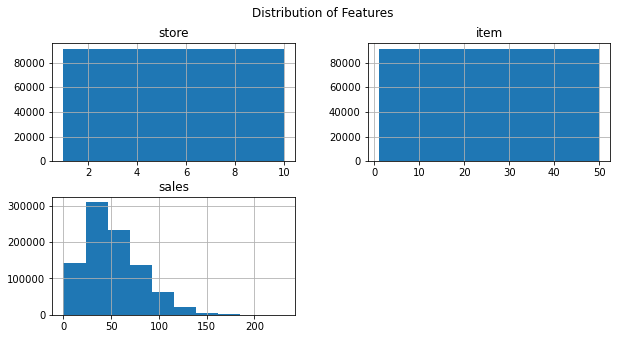

In [15]:
train_data.hist(figsize=(10,5))
plt.suptitle('Distribution of Features')
plt.show()

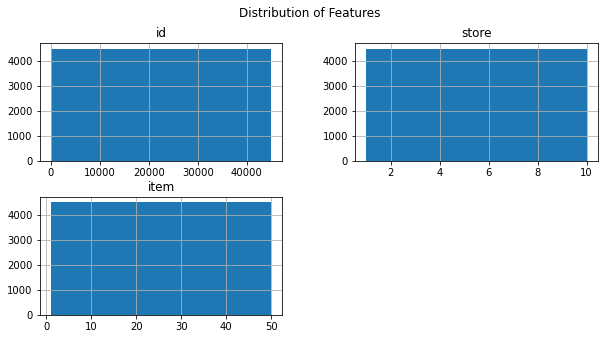

In [16]:
test_data.hist(figsize=(10,5))
plt.suptitle('Distribution of Features')
plt.show()


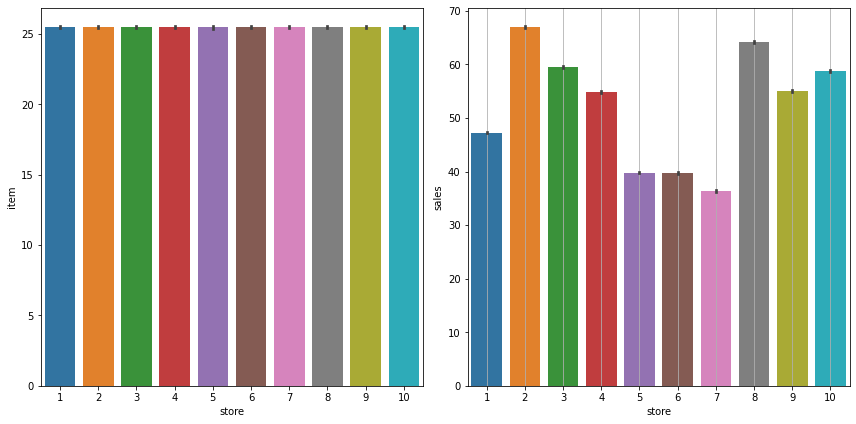

In [17]:
c=[ 'item', 'sales']
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i, subplot in zip(c,ax.flatten()):
    sns.barplot(x=train_data['store'], y= train_data[i], ax=subplot)
    plt.grid()
plt.tight_layout()

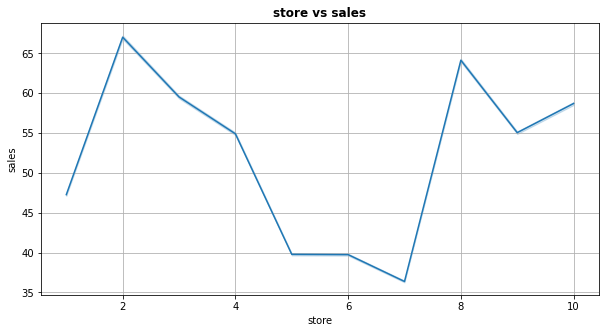

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='store',y='sales')
plt.title('store vs sales',fontweight="bold")
plt.grid()

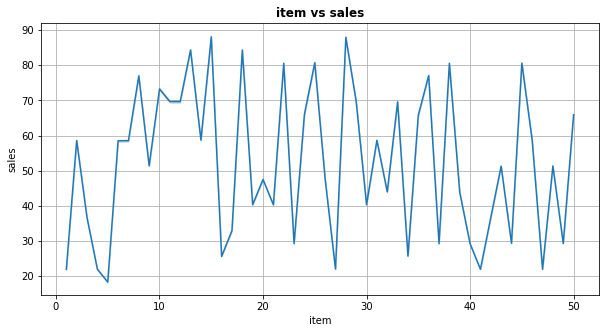

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='item',y='sales')
plt.title('item vs sales',fontweight="bold")
plt.grid()

In [20]:
train_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [21]:
train_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [22]:
test_data.isna().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# OUTliers

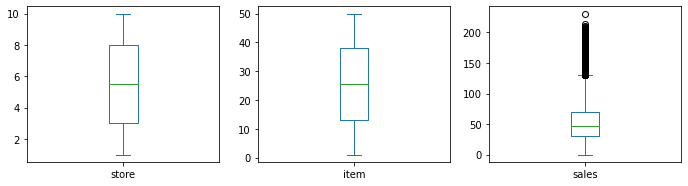

In [25]:
train_data.plot(kind="box",subplots=True,layout=(6,5),figsize=(20,20))
plt.show()

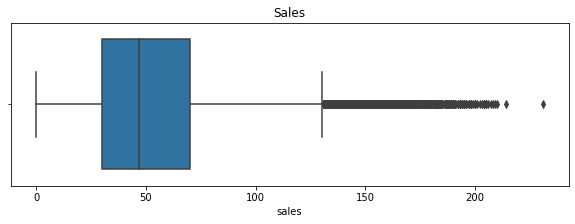

In [26]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()


In [27]:
q1=np.percentile(train_data['sales'],25,interpolation='midpoint')
q2=np.percentile(train_data['sales'],50,interpolation='midpoint')
q3=np.percentile(train_data['sales'],75,interpolation='midpoint')
iqr=q3-q1
up_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
print('\033[1;4m','Sales','\033[0m')
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('IQR:',iqr)
print('lower limit:',low_lim)
print('upper limit:',up_lim)
outlier=[]
for x in train_data['sales']:
    if ((x<low_lim) or (x>up_lim)):
        outlier.append(x)
    
train_data['sales']=np.where(train_data['sales']<low_lim,low_lim,np.where(train_data['sales']>up_lim,up_lim,train_data['sales']))
    
        

 Sales 
Q1: 30.0
Q2: 47.0
Q3: 70.0
IQR: 40.0
lower limit: -30.0
upper limit: 130.0


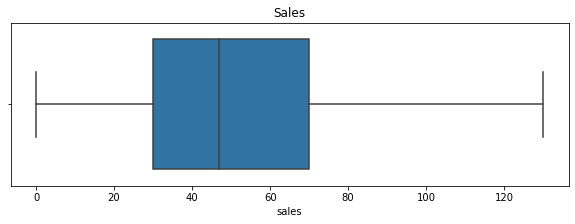

In [28]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    913000 non-null  object 
 1   store   913000 non-null  int64  
 2   item    913000 non-null  int64  
 3   sales   913000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ MB


In [30]:
# feature reduction

In [31]:
# to time series

In [32]:
train_data['date'] = pd.to_datetime(train_data['date'], format="%Y-%m-%d")
# per 1 store, 1 item
train_df = train_data[train_data['store']==1]
train_df = train_df[train_data['item']==1]
train_df['year'] = train_data['date'].dt.year
train_df['month'] = train_data['date'].dt.month
train_df['day'] = train_data['date'].dt.dayofyear
train_df['weekday'] = train_data['date'].dt.weekday

train_df

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13.0,2013,1,1,1
1,2013-01-02,1,1,11.0,2013,1,2,2
2,2013-01-03,1,1,14.0,2013,1,3,3
3,2013-01-04,1,1,13.0,2013,1,4,4
4,2013-01-05,1,1,10.0,2013,1,5,5
...,...,...,...,...,...,...,...,...
1821,2017-12-27,1,1,14.0,2017,12,361,2
1822,2017-12-28,1,1,19.0,2017,12,362,3
1823,2017-12-29,1,1,15.0,2017,12,363,4
1824,2017-12-30,1,1,27.0,2017,12,364,5


In [33]:
train_data.set_index('date',inplace=True)

In [34]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


Text(0, 0.5, 'sales')

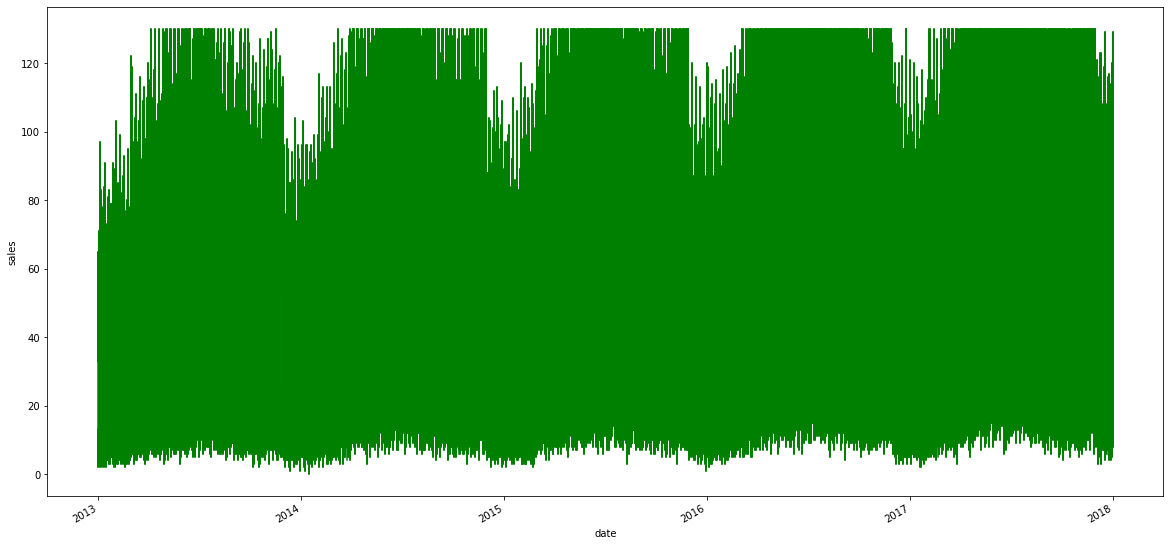

In [35]:
train_data['sales'].resample('D').plot(figsize=(20,10),c='green')
plt.ylabel('sales')

<AxesSubplot:xlabel='date', ylabel='sales'>

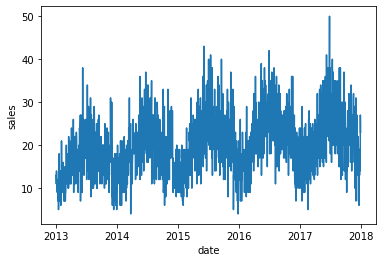

In [36]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)

<AxesSubplot:xlabel='year'>

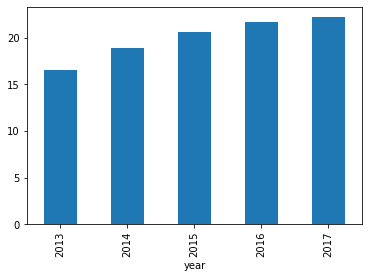

In [37]:
train_df.groupby('year')['sales'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

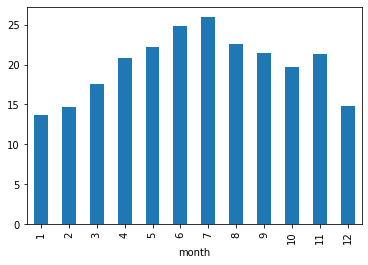

In [38]:
train_df.groupby('month')['sales'].mean().plot.bar()

<AxesSubplot:xlabel='weekday'>

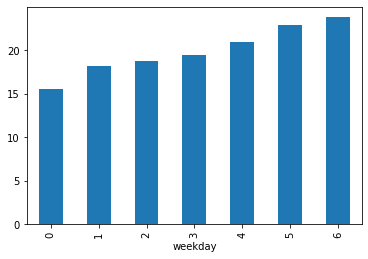

In [39]:
train_df.groupby('weekday')['sales'].mean().plot.bar()

<AxesSubplot:xlabel='date'>

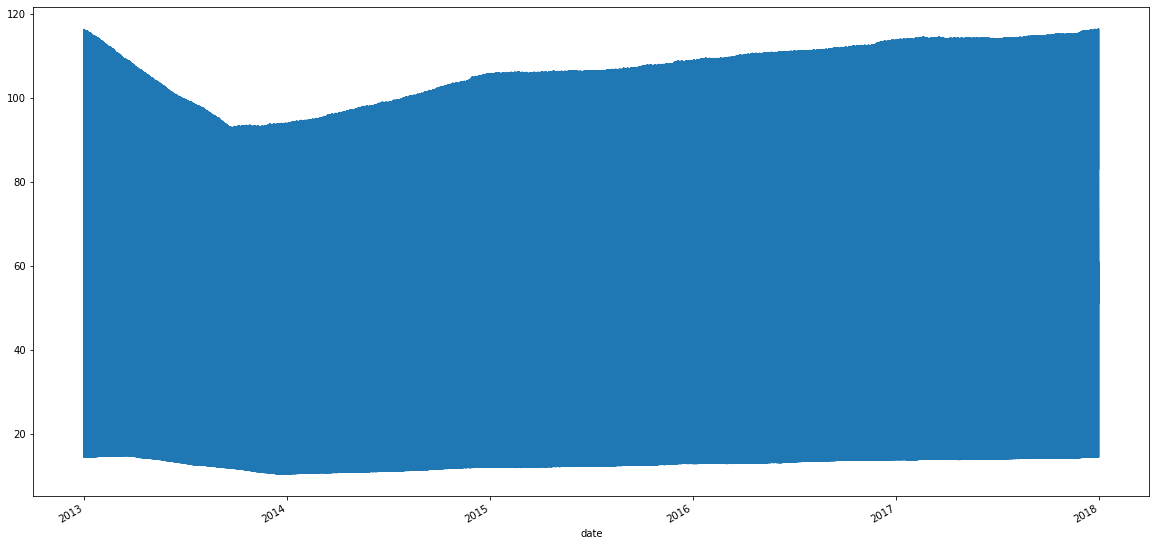

In [40]:
train_data['mov_avg'] =train_data['sales'].rolling(window=360).mean()
train_data['mov_avg'].dropna().plot(figsize=(20,10))

In [41]:
test_data['date']=pd.to_datetime(test_data['date'])

In [42]:
test_data.set_index('date',inplace=True)

In [43]:
test_data

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1
...,...,...,...
2018-03-27,44995,10,50
2018-03-28,44996,10,50
2018-03-29,44997,10,50


In [44]:
# Modeling

In [45]:
data1=train_data

In [46]:
data1=data1.drop([])

In [47]:
series=data1['sales'].squeeze()
type(series)

pandas.core.series.Series

In [48]:
values=pd.DataFrame(series)

In [49]:
base_model=pd.concat([values,values.shift(1)],axis=1)

In [50]:
base_model.head()

,sales,sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [51]:
base_model.columns=['Actual_sales','Forecasted_sales']

In [52]:
base_model.head()


,Actual_sales,Forecasted_sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [53]:
base_model.dropna()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0
...,...,...
2017-12-27,63.0,41.0
2017-12-28,59.0,63.0
2017-12-29,74.0,59.0


In [54]:
base_test=base_model[1:]
base_test.head()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0


In [55]:
from sklearn.metrics import mean_squared_error


In [56]:
base_error=mean_squared_error(base_test.Actual_sales,base_test.Forecasted_sales)
base_error

189.05599568017053

In [57]:
np.sqrt(base_error)

13.749763477244636

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

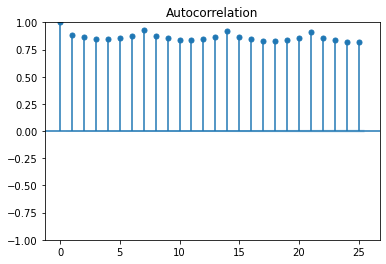

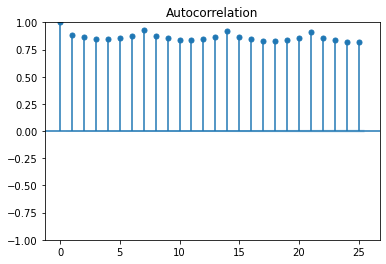

In [59]:
plot_acf(series,lags=25)

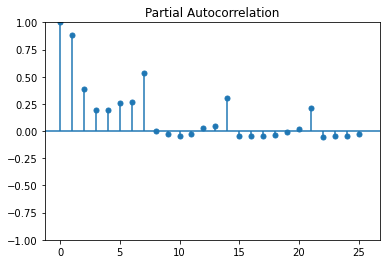

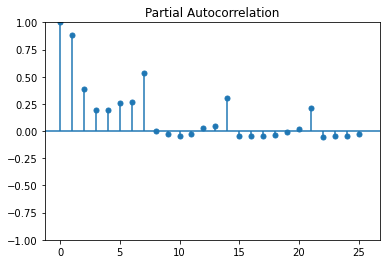

In [60]:
plot_pacf(series,lags=25)

In [61]:
train_data.columns

Index(['store', 'item', 'sales', 'mov_avg'], dtype='object')

In [62]:
train_data=train_data.drop(['mov_avg'],axis=1)

In [63]:
test=series[0:225000]
train=series[225000:912999]

In [64]:
test.size

225000

In [65]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [66]:
model = sm.tsa.arima.ARIMA(train, order=(0,1,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:               687999
Model:                 ARIMA(0, 1, 0)   Log Likelihood            -2776663.876
Date:                Thu, 06 Oct 2022   AIC                        5553329.752
Time:                        18:45:31   BIC                        5553341.193
Sample:                             0   HQIC                       5553332.949
                             - 687999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       187.5119      0.232    809.687      0.000     187.058     187.966
===================================================================================
Ljung-Box (L1) (Q):              121466.97   Jarque-Bera (JB):            152239.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start,end=end,typ='levels')
print(pred)

687999    62.0
688000    62.0
688001    62.0
688002    62.0
688003    62.0
          ... 
912994    62.0
912995    62.0
912996    62.0
912997    62.0
912998    62.0
Name: predicted_mean, Length: 225000, dtype: float64


<AxesSubplot:xlabel='date'>

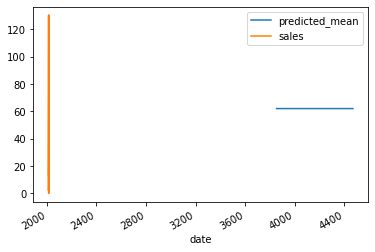

In [68]:
pred.plot(legend=True)
test.plot(legend=True)

In [69]:
test.mean()

52.24135111111111

In [70]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

29.906060924167196


In [71]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


In [72]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [73]:
train_data.shape

(913000, 3)

In [74]:
x=train_data.drop(['sales'],axis=1)
y=train_data['sales']

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape

(730400, 2)

In [76]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [77]:
predictions=model.predict(x_test)


In [78]:
predictions

array([24.971336, 16.687822, 65.84769 , ..., 78.97705 , 79.72152 ,
       97.22801 ], dtype=float32)

In [92]:
df=pd.DataFrame(predictions)
df

,0
0,24.971336
1,16.687822
2,65.847687
3,80.467636
4,45.985428
...,...
182595,89.501717
182596,58.800190
182597,78.977051
182598,79.721519


In [79]:

mse=mean_squared_error(y_test,predictions)
print('MSE:',mse)


MSE: 235.34999296606225


In [80]:
rmse=sqrt(mean_squared_error(y_test,predictions))
print(rmse)

15.341120981403616


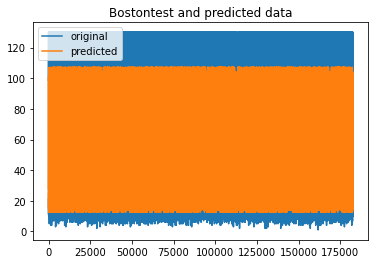

In [81]:
x_ax=range(len(y_test))
plt.plot(x_ax,y_test,label='original')
plt.plot(x_ax,predictions,label='predicted')
plt.title('Bostontest and predicted data')
plt.legend()
plt.show()

In [82]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


In [83]:
from sklearn import linear_model
lr=linear_model.LinearRegression() 

In [84]:
lrmodel=lr.fit(x_train,y_train)
pred=lrmodel.predict(x_test)

In [85]:
print(pred)

[51.59077789 54.34305561 54.2909152  ... 53.68012522 51.84403185
 54.17918503]


In [86]:
print("MSE",mean_squared_error(y_test,pred))

MSE 793.6569518460776


In [87]:
from sklearn.metrics import r2_score
r_sq=r2_score(y_test,pred)
r_sq

0.0036191555274804887

In [88]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


In [89]:
train_data.to_csv('salesdata.csv',index=False)